In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.keras.backend.clear_session()

In [2]:
from tensorflow import keras
inputs = keras.Input(shape=(784,))

In [3]:
inputs.shape

TensorShape([None, 784])

In [4]:
from tensorflow.keras import layers
dense = layers.Dense(64, activation='relu')
x = dense(inputs)

In [5]:
inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist')
model.summary()

Model: "mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.utils.np_utils import to_categorical

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')/255
x_test = x_test.reshape(10000, 784).astype('float32')/255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.RMSprop(),
             metrics=['accuracy'])
history = model.fit(x_train, y_train,
                   batch_size=64, 
                   epochs=5,
                   validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print(test_scores[0])
print(test_scores[1])

Using TensorFlow backend.


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.3482 - accuracy: 0.9011 - val_loss: 0.1886 - val_accuracy: 0.9467
Epoch 2/5
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1619 - accuracy: 0.9521 - val_loss: 0.1356 - val_accuracy: 0.9604
Epoch 3/5
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1171 - accuracy: 0.9656 - val_loss: 0.1211 - val_accuracy: 0.9644
Epoch 4/5
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0944 - accuracy: 0.9717 - val_loss: 0.1188 - val_accuracy: 0.9676
Epoch 5/5
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.1044 - val_accuracy: 0.9719
10000/1 - 0s - loss: 0.0542 - accuracy: 0.9719
0.09583709404510446
0.9719


In [7]:
model.save('firstmodel.h5')
del model
model = keras.models.load_model('firstmodel.h5')

In [8]:
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [9]:
decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4,4,1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145 

In [10]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 16)                18672     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(shape=(None,), name='title')  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body')  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     640000      title[0][0]                      
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     640000      body[0][0]                       
______________________________________________________________________________________________

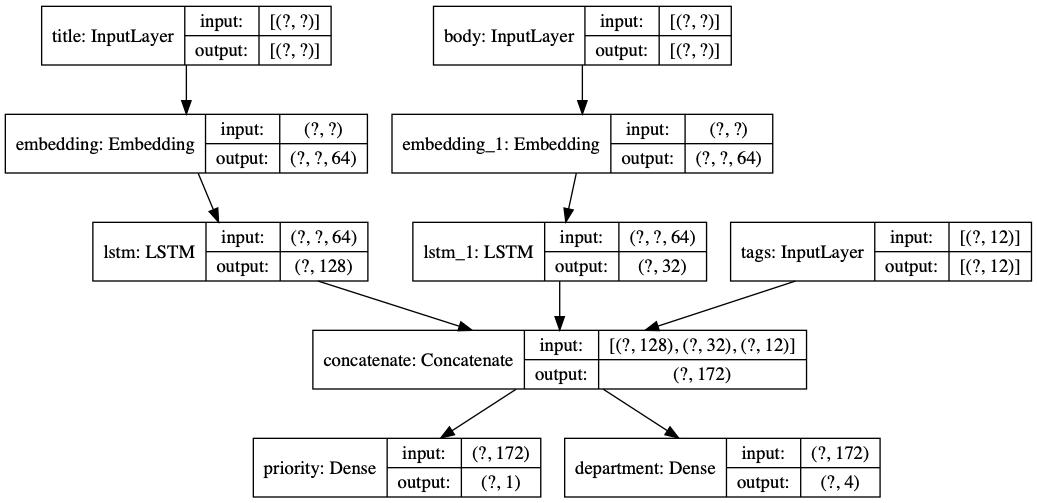

In [13]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [14]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss=['binary_crossentropy', 'categorical_crossentropy'],
             loss_weights=[1., 0.2])

In [15]:
import numpy as np

# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
print(title_data[:1])
body_data = np.random.randint(num_words, size=(1280, 100))
print(body_data[:1])
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
print(tags_data[:1])
# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
print(priority_targets[:1])
dept_targets = np.random.randint(2, size=(1280, num_departments))
print(dept_targets[:1])
model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
          {'priority': priority_targets, 'department': dept_targets},
          epochs=2,
          batch_size=32)

[[5336 3502 2268 7507  888 2325 7804 3436 6322 5371]]
[[8861 4620 1914 4692 3063  105 2866 2051 7727 9078 6805 5400 7570 8930
  6260 4528 8341 7040 7099 9377 6277 6012 6754 2133 6804 3086 7741 5395
  2334 6127 7575 7065  334  854 5827 8166 3766 2773 1306 9878 4710  204
  1813 3883 6504 9623 7415 6975 9135  305 3133 4938 8601 9188 7608 9471
   643 5872  179 9787  424 1322  475 5913 6931 4405 8989 2782 6935 2100
   985 9785 3387 3984 6839 5862 2564 7461 2475 4890 9553 9985 4063 5045
  9772 7920 6099 4752 2271 5684 1926 1291 9462 2089 6812 9434 5418 4041
  8517 6738]]
[[1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]]
[[0.62417488]]
[[1 1 0 1]]
Train on 1280 samples
Epoch 1/2
1280/1280 [==============================] - 6s 4ms/sample - loss: 1.2843 - priority_loss: 0.6971 - department_loss: 2.9360
Epoch 2/2
1280/1280 [==============================] - 2s 2ms/sample - loss: 1.2653 - priority_loss: 0.6965 - department_loss: 2.8438


In [16]:
inputs = keras.Input(shape=(32,32,3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPool2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()


Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_4[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_5[0][0]                   
_________________________________________________________________________________________

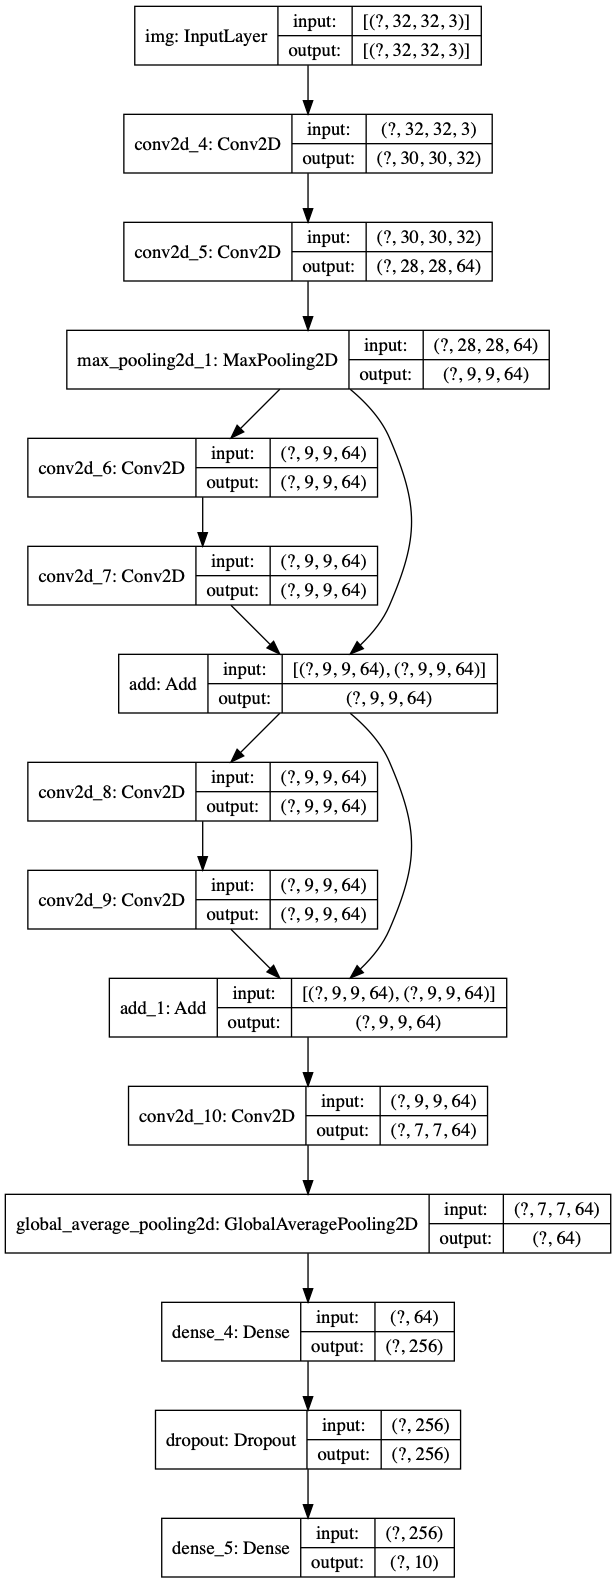

In [17]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

In [20]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss='categorical_crossentropy',
             metrics=['acc'])


In [22]:
shared_embedding = layers.Embedding(1000, 128)
text_input_a = keras.Input(shape=(None,), dtype='int32')
text_input_b = keras.Input(shape=(None,), dtype='int32')
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [ ]:
from tensorflow.keras.applications import VGG19
vgg19 = VGG19()
features_list = [layer.output for layer in vgg19.layers]

 27336704/574710816 [>.............................] - ETA: 12:04:06

In [ ]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)
img = np.random.random((1, 244, 244, 3)).astype('float32')
extracted_features = feat_extraction_model(img)

In [2]:
def searchInsert(nums, target):
    low = 0
    high = len(nums)-1
    while low<=high:
        mid = (low+high)//2
        if nums[mid] > target:
            high = mid - 1
        elif nums[mid] < target:
            low = mid + 1
        else:
            return mid
    return low  

In [6]:
def combinationSum(nums, target):
    res = []
    nums.sort()
    dfs(nums, target, 0, [], res)
    return res

def dfs(nums, target, index, path, res):
    if target<0:
        return 
    if target==0:
        res.append(path)
        return
    for i in range(index, len(nums)):
        dfs(nums, target-nums[i], i, path+[nums[i]], res)
        
candidates = [2,3,6,7]
target = 7
print(combinationSum(candidates, target))

[[2, 2, 3], [7]]


In [7]:
def combinationSum(nums, target):
    nums.sort()
    res = []
    dfs(nums, target, 0, [], res)
    return res

def dfs(nums, target, index, path, res):
    if target<0:
        return 
    if target==0:
        res.append(path)
        return
    for i in range(index, len(nums)):
        dfs(nums, target-nums[i], i, path+[nums[i]], res)

In [16]:
def combinationSum(nums, target):
    nums.sort()
    res = []
    dfs(nums, target, 0, [], res)
    return res
def dfs(nums, target, index, path, res):
    if target<0:
        return 
    if target==0:
        res.append(path)
        return
    for i in range(index, len(nums)):
        dfs(nums, target-nums[i], i, path+[nums[i]], res)
        
candidates = [2,3,6,7]
target = 7
print(combinationSum(candidates, target))

[[2, 2, 3], [7]]


In [14]:
def combinationSum2(nums, target):
    nums.sort()
    res = []
    dfs(nums, target, 0, [], res)
    return res

def dfs(nums, target, index, path, res):
    if not target:
        res.append(path)
        return
    for i in range(index, len(nums)):
        if i>index and nums[i]==nums[i-1]:
            continue
        if nums[i]>target:
            break
        dfs(nums, target-nums[i], i+1, path+[nums[i]], res)
        
candidates = [10,1,2,7,6,1,5]
target = 8
print(combinationSum2(candidates, target))

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]


In [19]:
def combinationSum2(nums, target):
    nums.sort()
    res = []
    dfs(nums, target, 0, [], res)
    return res

def dfs(nums, target, index, path, res):
    if not target:
        res.append(path)
        return
    for i in range(index, len(nums)):
        if i>index and nums[i]==nums[i-1]:
            continue
        if nums[i] > target:
            break
        dfs(nums, target-nums[i], i+1, path+[nums[i]], res)
candidates = [10,1,2,7,6,1,5]
target = 8
print(combinationSum2(candidates, target))

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]


In [20]:
def firstMissingPos(nums):
    for i in range(len(nums)):
        while 0<=nums[i]-1<len(nums) and nums[nums[i]-1]!=nums[i]:
            tmp = nums[i]-1
            nums[i], nums[tmp] = nums[tmp], nums[i]
    for i in range(len(nums)):
        if nums[i]!=i+1:
            return i+1
    return len(nums)+1

In [21]:
def firstMissingPos(nums):
    for i in range(len(nums)):
        while 0<=nums[i]-1<len(nums) and nums[nums[i]-1]!=nums[i]:
            tmp = nums[i]-1
            nums[i], nums[tmp] = nums[tmp], nums[i]
    for i in range(len(nums)):
        if nums[i] != i+1:
            return i+1
    return len(nums)+1

In [22]:
def firstMissingPos(nums):
    for i in range(len(nums)):
        while 0<=nums[i]-1<len(nums) and nums[nums[i]-1]!=nums[i]:
            tmp = nums[i]-1
            nums[i], nums[tmp] = nums[tmp], nums[i]
    for i in range(len(nums)):
        if nums[i] != i+1:
            return i+1
    return len(nums)+1

In [25]:
def trap(nums):
    if not nums or len(nums)<3:
        return 0
    volume = 0
    left, right = 0, len(nums)-1
    lmax, rmax = nums[left], nums[right]
    while left<right:
        if nums[left]<nums[right]:
            if nums[left]>lmax:
                lmax = nums[left]
            else:
                volume += lmax-nums[left]
            left += 1
        else:
            if nums[right]>rmax:
                rmax = nums[right]
            else:
                volume += rmax-nums[right]
            right -= 1
    return volume
nums = [0,1,0,2,1,0,1,3,2,1,2,1]
print(trap(nums))

6


In [26]:
def trap(nums):
    if not nums or len(nums)<3:
        return 0
    volume = 0
    left, right = 0, len(nums)-1
    lmax, rmax = nums[left], nums[right]
    while left<right:
        if nums[left] < nums[right]:
            if nums[left] > lmax:
                lmax = nums[left]
            else:
                volume += lmax-nums[left]
        else:
            if nums[right] > rmax:
                rmax = nums[right]
            else:
                volume += rmax-nums[right]
    return volume

In [28]:
def jump(nums):
    n, start, end, step = len(nums), 0, 0, 0
    while end<n-1:
        step += 1
        maxend = end + 1
        for i in range(start, end+1):
            if i+nums[i] >= n-1:
                return step
            maxend = max(maxend, i+nums[i])
        start, end = end+1, maxend
    return step
nums = [2,3,1,1,4]
print(jump(nums))

2


In [29]:
def jump(nums):
    n, start, end, step = len(nums), 0, 0, 0
    while end<n-1:
        step += 1
        maxend = end + 1
        for i in range(start, end+1):
            if i+nums[i]>=n-1:
                return step
            maxend = max(maxend, i+nums[i])
        start, end = end+1, maxend
    return step

In [30]:
def jump(nums):
    n, start, end, step = len(nums), 0, 0, 0
    while end < n-1:
        step += 1
        maxend = end + 1
        for i in range(start, end+1):
            if i+nums[i]>=n-1:
                return step
            maxend = max(maxend, i+nums[i])
        start, end = end+1, maxend
    return step

In [32]:
def maxSubArray(nums):
    curSum = MaxSum = nums[0]
    for item in nums[1:]:
        curSum = max(curSum, curSum+item)
        maxSum = max(maxSum, curSum)
    return maxSum

In [33]:
def jump(nums):
    m = 0
    for i, item in enumerate(nums):
        if i>m:
            return False
        m = max(m, i+item)
    return True

In [34]:
def jump(nums):
    m = 0
    for i, item in enumerate(nums):
        if i>m:
            return False
        m = max(m, i+item)
    return True

In [35]:
def jump(nums):
    m = 0
    for i, item in enumerate(nums):
        if i>m:
            return False
        m = max(m, i+item)
    return True

In [38]:
def merge(nums):
    nums.sort(key=lambda x: x[0])
    merged = []
    for item in nums:
        if not merged or merged[-1][-1]<item[0]:
            merged.append(item)
        else:
            merged[-1][-1] = max(merged[-1][-1], item[-1])
    return merged

In [39]:
def merge(nums):
    nums.sort(key=lambda x:x[0])
    merged = []
    for item in nums:
        if not merged or merged[-1][-1]<item[0]:
            merged.append(item)
        else:
            merged[-1][-1] = max(merged[-1][-1], item[-1])
    return merged

In [43]:
def insert(nums, newItem):
    s, e = newItem[0], newItem[-1]
    left = []
    right = []
    for item in nums:
        if item[-1]<s:
            left.append(item)
        elif item[0] > e:
            right.append(item)
        else:
            s = min(s, item[0])
            e = max(e, item[-1])
    return left + [[s, e]] + right
intervals = [[1,3],[6,9]]
newInterval = [2,5]
print(insert(intervals, newInterval))

[[1, 5], [6, 9]]


In [44]:
def insert(nums, newItem):
    s, e = newItem[0], newItem[-1]
    left = []
    right = []
    for item in nums:
        if item[-1] < s:
            left.append(item)
        elif item[0] > e:
            right.append(item)
        else:
            s = min(s, item[0])
            e = max(e, item[-1])
    return left + [[s, e]] + right
    

In [48]:
def uniquepath(m,n):
    res = 0
    if m<0 or n<0:
        return res
    res_matrix = [[0 for i in range(n+1)] for j in range(m+1)]
    res_matrix[1][1] = 1
    for i in range(1, m+1):
        for j in range(1, n+1):
            res_matrix[i][j] += res_matrix[i-1][j] + res_matrix[i][j-1]
    return res_matrix[-1][-1]
m = 3
n = 2
print(uniquepath(m,n))

3


In [49]:
def unique(m, n):
    res = 0
    if m<0 or n<0:
        return res
    res_matrix = [[0 for i in range(n+1)] for j in range(m+1)]
    res_matrix[1][1] = 1
    for i in range(1, m+1):
        for j in range(1, n+1):
            res_matrix[i][j] += res_matrix[i-1][j] + res_matrix[i][j-1]
    return res_matrix[-1][-1]

In [52]:
def unique(nums):
    m = len(nums)
    n = len(nums[0])
    if nums[0][0] == 1:
        return 0
    nums[0][0] = 1
    for i in range(1, m):
        nums[i][0] = int(nums[i][0]==0 and nums[i-1][0]==1)
    for j in range(1, n):
        nums[0][j] = int(nums[0][j]==0 and nums[0][j-1]==1)
    print(nums)
    for i in range(1, m):
        for j in range(1, n):
            if nums[i][j]==0:
                nums[i][j] = nums[i-1][j] + nums[i][j-1]
            else:
                nums[i][j] = 0
    return nums[m-1][n-1]
nums = [
  [0,0,0],
  [0,1,0],
  [0,0,0]
]
print(unique(nums))

[[1, 1, 1], [1, 1, 0], [1, 0, 0]]
2


In [55]:
def unique(nums):
    m = len(nums)
    n = len(nums[0])
    if nums[0][0]==1:
        return 0
    nums[0][0] = 1
    for i in range(1, m):
        nums[i][0] = int(nums[i][0]==0 and nums[i-1][0]==1)
    for j in range(1, n):
        nums[0][j] = int(nums[0][j]==0 and nums[0][j-1]==1)
    for i in range(1, m):
        for j in range(1, n):
            if nums[i][j]==0:
                nums[i][j] = nums[i-1][j] + nums[i-1][j]
            else:
                nums[i][j] = 0
    return nums[m-1][n-1]

In [59]:
def minPathSum(nums):
    m = len(nums)
    n = len(nums[0])
    for i in range(1, n):
        nums[0][i] += nums[0][i-1]
    for i in range(1, m):
        nums[i][0] += nums[i-1][0]
    print(nums)
    for i in range(1, m):
        for j in range(1, n):
            nums[i][j] += min(nums[i-1][j], nums[i][j-1])
    print(nums)
    return nums[-1][-1]
nums = [
  [1,3,1],
  [1,5,1],
  [4,2,1]
]
print(minPathSum(nums))

[[1, 4, 5], [2, 5, 1], [6, 2, 1]]
[[1, 4, 5], [2, 7, 6], [6, 8, 7]]
7


In [60]:
def minPathSum(nums):
    m = len(nums)
    n = len(nums[0])
    for i in range(1, n):
        nums[0][i] += nums[0][i-1]
    for i in range(1, m):
        nums[i][0] += nums[i-1][0]
    for i in range(1, m):
        for j in range(1, n):
            nums[i][j] += min(nums[i-1][j], nums[i][j-1])
    return nums[-1][-1]
        

In [62]:
def plusOne(nums):
    num = 0
    for i in range(len(nums)):
        num += nums[i] * pow(10, (len(nums)-1-i))
    return [int(i) for i in str(num+1)]
nums = [1,2,3]
print(plusOne(nums))

[1, 2, 4]


In [63]:
def serZero(nums):
    is_col = False
    R = len(nums)
    C = len(nums[0])
    for i in range(R):
        if matrix[i][0]==0:
            ic_col = True
        for j in range(1,C):
            if matrix[i][j]==0:
                matrix[0][j] = 0
                matrix[i][0] = 0
    for i in range(1,R):
        for j in range(1,C):
            if nums[i][0]==0 or nums[0][j]==0:
                nums[i][j]=0
    if nums[0][0]==0:
        for j in range(C):
            nums[0][j] = 0
    if is_col:
        for i in range(R):
            nums[i][0] = 0

In [65]:
def searchMatrix(nums, target):
    for i in range(len(nums)):
        if len(nums[0])!=0 and nums[i][len(nums[0])-1]>=target:
            start = 0
            end = len(nums[0])-1
            while start<=end:
                mid = (start+end)//2
                if nums[i][mid]==target:
                    return True
                elif nums[i][mid]>target:
                    end = mid-1
                else:
                    start = mid+1
            break
    return False

matrix = [
  [1,   3,  5,  7],
  [10, 11, 16, 20],
  [23, 30, 34, 50]
]
target = 3
print(searchMatrix(matrix, target))

True


In [66]:
def searchMatrix(nums, target):
    for i in range(len(nums)):
        if len(nums[0])!=0 and nums[i][len(nums[0])-1]>=target:
            start = 0
            end = len(nums[0])-1
            while start<=end:
                mid = (start+end)//2
                if nums[i][mid]==target:
                    return True
                elif nums[i][mid]>target:
                    end = mid-1
                else:
                    start = mid+1
            break
    return False